# Explore results from 500m MIKE SHE Skjern model

### **Output Files**

Outputs from a MIKE SHE simulation are in a variety of formats. The following descriptions are from [MIKE Web Help > Output Files](https://doc.mikepoweredbydhi.help/webhelp/2025/mikeshe/MIKE_SHE_online/Working_with_Results/Output_Files.htm).

- **.sheres** — ASCII file that is a catalogue of all the output files associ­ated with a simulation.
- **.hot.sheres** — reduced version of the .sheres file for hot starting only.
- **.frf** — binary output file containing all of the static information on the simulation, as well as all of the time series results that cannot be easily stored in a dfs format.
- **.dfs0, .dfs2, .dfs3** — binary time series format. Each file can contain multi­ple output items, but each of the items must be stored at the same time step interval. 

Here we will focus on dfs outputs and show how to visualize a few here. More detail on each of the outputs are described here [MIKE Web Help](https://doc.mikepoweredbydhi.help/webhelp/2025/mikeshe/MIKE_SHE_online/MSHE_Getting_started/Getting_Started.htm), under sections [Output Files](https://doc.mikepoweredbydhi.help/webhelp/2025/mikeshe/MIKE_SHE_online/Working_with_Results/Output_Files.htm) and [Output Items](https://doc.mikepoweredbydhi.help/webhelp/2025/mikeshe/MIKE_SHE_online/Working_with_Results/Output_Items.htm)

The filenames and the variables they contain are listed in the [MIKE SHE Web Help Appendix A](https://doc.mikepoweredbydhi.help/webhelp/2025/mikeshe/index.htm#MIKE_SHE_online/AppendixA/Appendix.htm#XREF_90729_A_1_MIKE_SHE)



### **Water Balance Tool Output**

The MIKE Zero [Water Balance Tool](https://doc.mikepoweredbydhi.help/webhelp/2025/mikeshe/MIKE_SHE_online/Water_Balance/Using_the_Water_Balance_Tool.htm) post-processes the results from the MIKE SHE simulations and creates water balance summaries for the individual components (fx. Overland Flow (OF), Saturated Zone (SZ), Unsaturated Zone (UZ), Irrigation, etc.)

The Water Balance Tool is part of the MIKE Zero toolbox. Here we will plot some of the outputs created in the tool's GUI. More details on how to use the Water Balance Tool are shown at [MIKE SHE Web Help][https://doc.mikepoweredbydhi.help/webhelp/2025/mikeshe/MIKE_SHE_online/Water_Balance/Creating_a_water_balance.htm]

*Note: The values in the water balance are in the EUM unit type (here, mm) Storage Depth. These storage depths can be converted to volumes by multiplying by the internal model area, found in the _WM_PRINT.LOG file.*


In [137]:
import mikeio
import geopandas as gpd
import matplotlib.pyplot as plt

In [136]:
def plot_dfs2_output(filepath, varname=None, timeID=0, ax=None, shapefile=None,layerID=None):
    """
    Plot a dfs2 output file.
    
    Parameters:
    - filepath: Path to the dfs2 file.
    - ax: Matplotlib axis to plot on (optional).
    - varname: Variable name to plot (optional, if not provided, first variable is used).
    - timeID: Time index to select from the dfs2 file (default is 0).
    """
    ds = mikeio.read(filepath)
    if varname is None:
        varname = ds.variables[0].name

    # Check if dfs3 or dfs2
    if len(ds[0].dims) == 4:
        data = ds[varname][timeID,layerID]
    else:
        data = ds[varname][timeID]
    
    if ax is None:
        fig, ax = plt.subplots(figsize=(9, 6))

    datestr = str(ds[varname][timeID].time[0])[0:10]
    
    #capitailize first letter of variable name
    varname_caps = varname.capitalize() if varname else "Variable"

    data.plot.contourf(ax=ax, cmap='viridis')
    ax.set_title(f"{varname_caps} at {datestr}")

    # Check if shapefile is provided and plot it
    if shapefile is not None:
        shapefile.plot(facecolor='none', edgecolor='black',ax=ax)


    plot_settings(ax)
    
    return ax


def plot_settings(ax):
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('')
    ax.set_ylabel('')
    # remove plot border
    for spine in ax.spines.values():
        spine.set_visible(False)

def plot_wb_output(filepath,title,varlist=None):
    wb = mikeio.read(filepath)
    wb_df = wb.to_dataframe() # For more plotting options

    if varlist is not None:
        wb_df = wb_df[varlist]

    fig, ax = plt.subplots(figsize=(12, 6))
    wb_df.plot(ax=ax,fontsize=15).legend(loc='center',bbox_to_anchor=(1.15,0.4))
    plt.ylabel('Storage Depth [mm]',fontsize=15)
    plt.title(label=title,fontsize=20)
    plt.show()


In [ ]:
# reslts folder
res_folder = r"..\Skjern_Models\Setup\HIP_500m_mh_Skjern_DHI.mhydro - Result Files"

In [138]:
# ---------------------- Read a sample file to see the structure and variable names ----------------------
dfs2 =mikeio.read(r"..\Skjern_Models\Setup\HIP_500m_Skjern_DHI.she - Result Files\HIP_500m_Skjern_DHI_overland.dfs2")
print(dfs2)

dfs3 = mikeio.read(r"..\Skjern_Models\Setup\HIP_500m_Skjern_DHI.she - Result Files\HIP_500m_Skjern_DHI_3DSZflow.dfs3")
print(dfs3[0])

<mikeio.Dataset>
dims: (time:782, y:140, x:180)
time: 1990-01-02 06:00:00 - 2019-12-10 06:00:00 (782 records)
geometry: Grid2D (ny=140, nx=180)
items:
  0:  depth of overland water <Water Depth> (meter)
  1:  overland flow in x-direction <Discharge> (meter pow 3 per sec) - 3
  2:  overland flow in y-direction <Discharge> (meter pow 3 per sec) - 3
  3:  OL drainage Outflow <Discharge> (meter pow 3 per sec) - 3
  4:  OL Drain Stored Volume <Water Volume> (meter pow 3)
  5:  OL Drain Storage Inflow (flow) <Discharge> (meter pow 3 per sec) - 3
<mikeio.DataArray>
name: groundwater flow in x-direction
dims: (time:782, z:8, y:140, x:180)
time: 1990-01-02 06:00:00 - 2019-12-10 06:00:00 (782 records)
geometry: Grid3D(nz=8, ny=140, nx=180)



<Axes: title={'center': 'Head elevation in saturated zone at 2019-12-10'}>

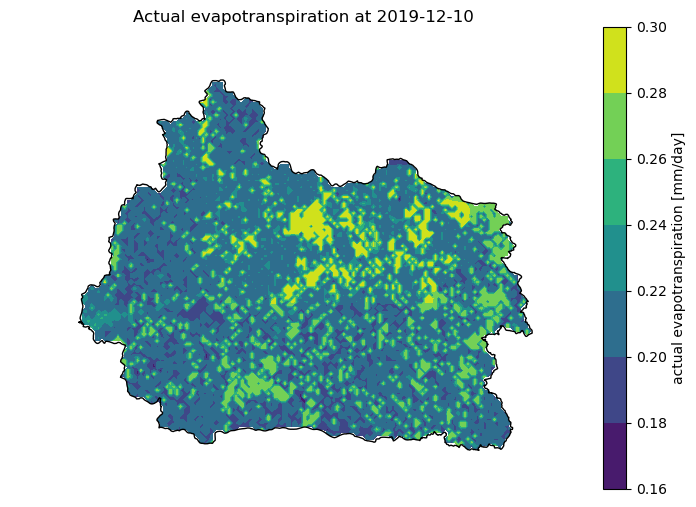

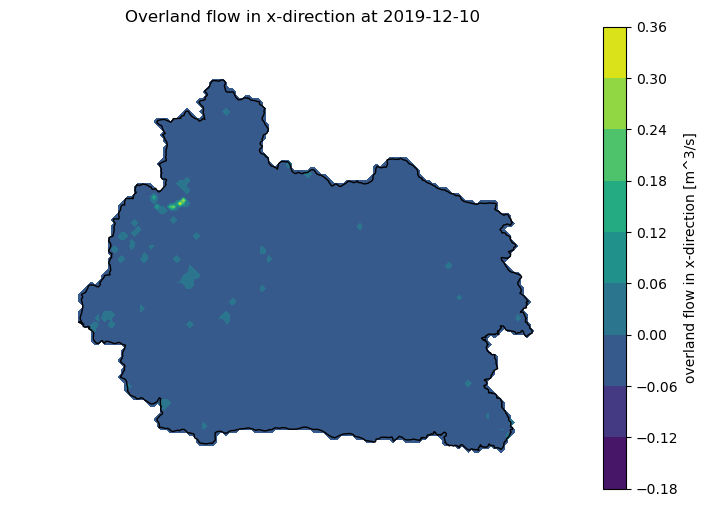

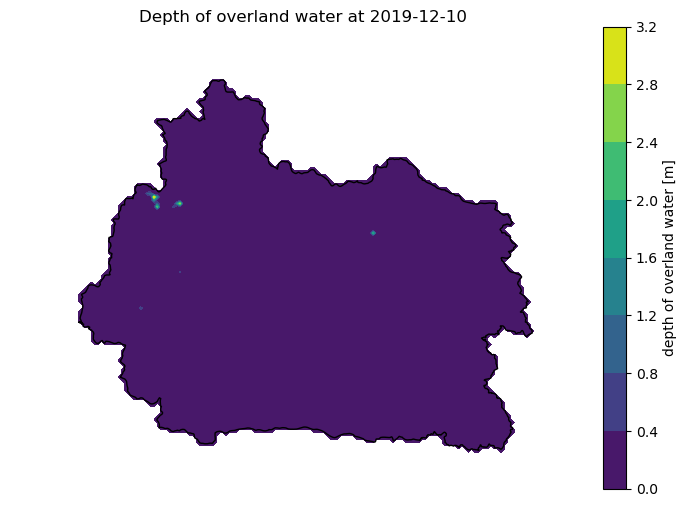

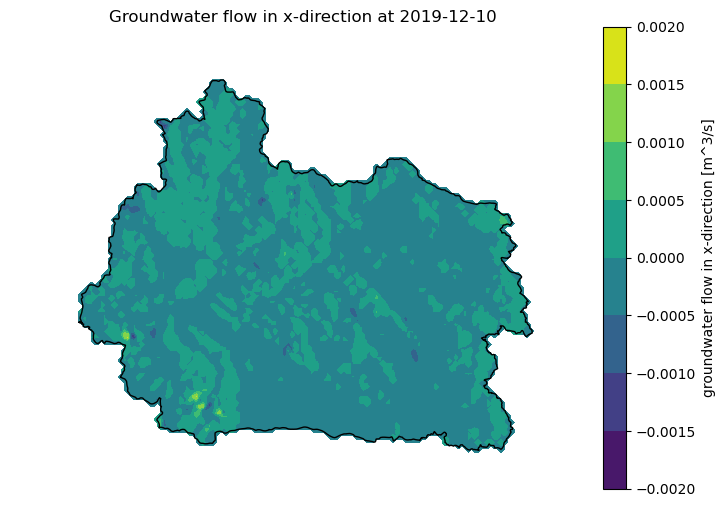

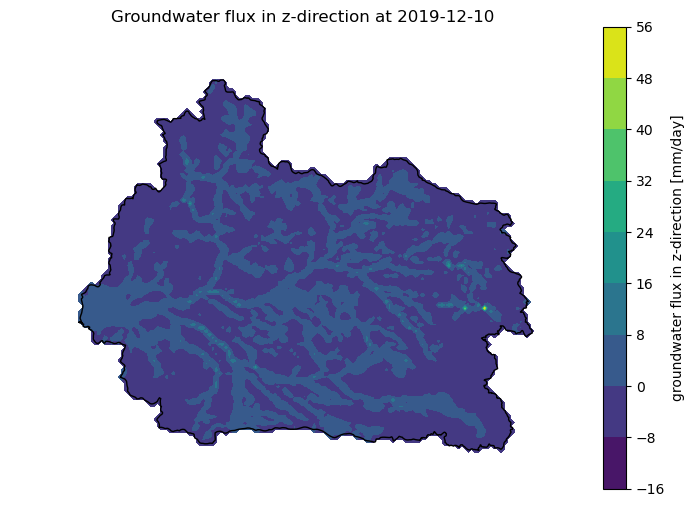

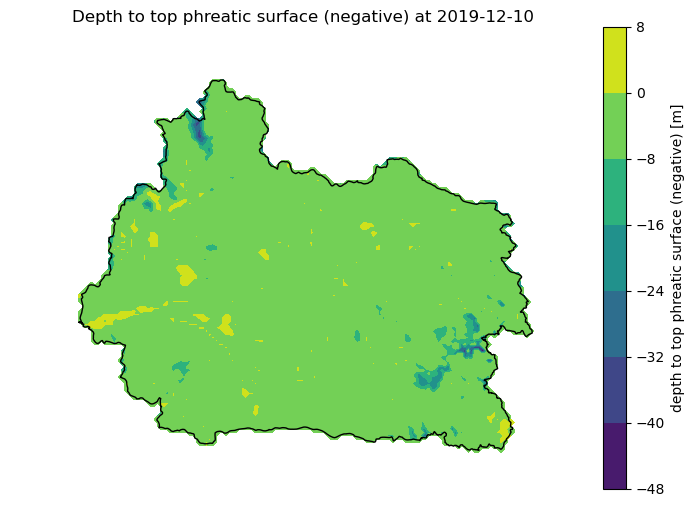

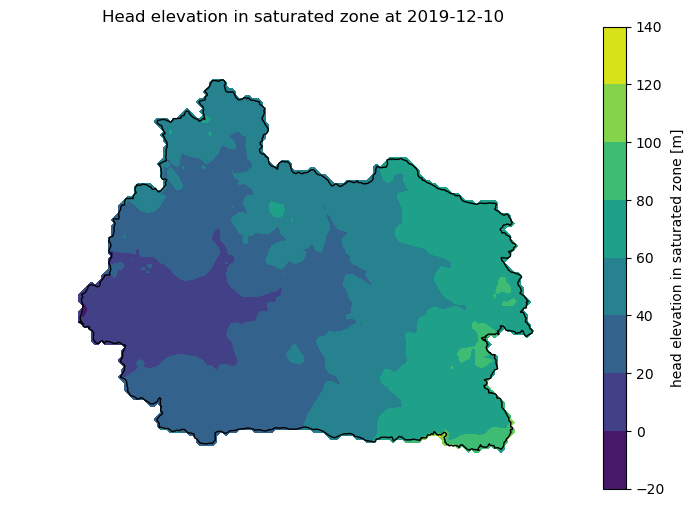

In [139]:
# ---------------------- View some gridded results ----------------------

domain_shp = gpd.read_file(r"..\MapsDK\DKDomains2013\ID15_oplande_Skjern.shp")

# Actual evapotranspiration
plot_dfs2_output(r"..\Skjern_Models\Setup\HIP_500m_Skjern_DHI.she - Result Files\HIP_500m_Skjern_DHI_ET_UzCells.dfs2", varname='actual evapotranspiration', timeID=-1, ax=None, shapefile=domain_shp)

# Overland flow in x direction
plot_dfs2_output(r"..\Skjern_Models\Setup\HIP_500m_Skjern_DHI.she - Result Files\HIP_500m_Skjern_DHI_overland.dfs2", varname='overland flow in x-direction', timeID=-1, ax=None, shapefile=domain_shp)

# Overland water depth
plot_dfs2_output(r"..\Skjern_Models\Setup\HIP_500m_Skjern_DHI.she - Result Files\HIP_500m_Skjern_DHI_overland.dfs2", varname='depth of overland water', timeID=-1, ax=None, shapefile=domain_shp)

# Groundwater flow in x,y,z direction
plot_dfs2_output(r"..\Skjern_Models\Setup\HIP_500m_Skjern_DHI.she - Result Files\HIP_500m_Skjern_DHI_3DSZflow.dfs3", varname='groundwater flow in x-direction', timeID=-1, ax=None, shapefile=domain_shp,layerID=4)

# Groundwater flux in z direction
plot_dfs2_output(r"..\Skjern_Models\Setup\HIP_500m_Skjern_DHI.she - Result Files\HIP_500m_Skjern_DHI_3DSZflow.dfs3", varname='groundwater flux in z-direction', timeID=-1, ax=None, shapefile=domain_shp,layerID=4)

# depth to phreatic surface (negative)
plot_dfs2_output(r"..\Skjern_Models\Setup\HIP_500m_Skjern_DHI.she - Result Files\HIP_500m_Skjern_DHI_2DSZ.dfs2", varname='depth to top phreatic surface (negative)', timeID=-1, ax=None, shapefile=domain_shp,layerID=4)

# head elevation in saturated zone
plot_dfs2_output(r"..\Skjern_Models\Setup\HIP_500m_Skjern_DHI.she - Result Files\HIP_500m_Skjern_DHI_3DSZ.dfs3", varname='head elevation in saturated zone', timeID=-1, ax=None, shapefile=domain_shp,layerID=4)


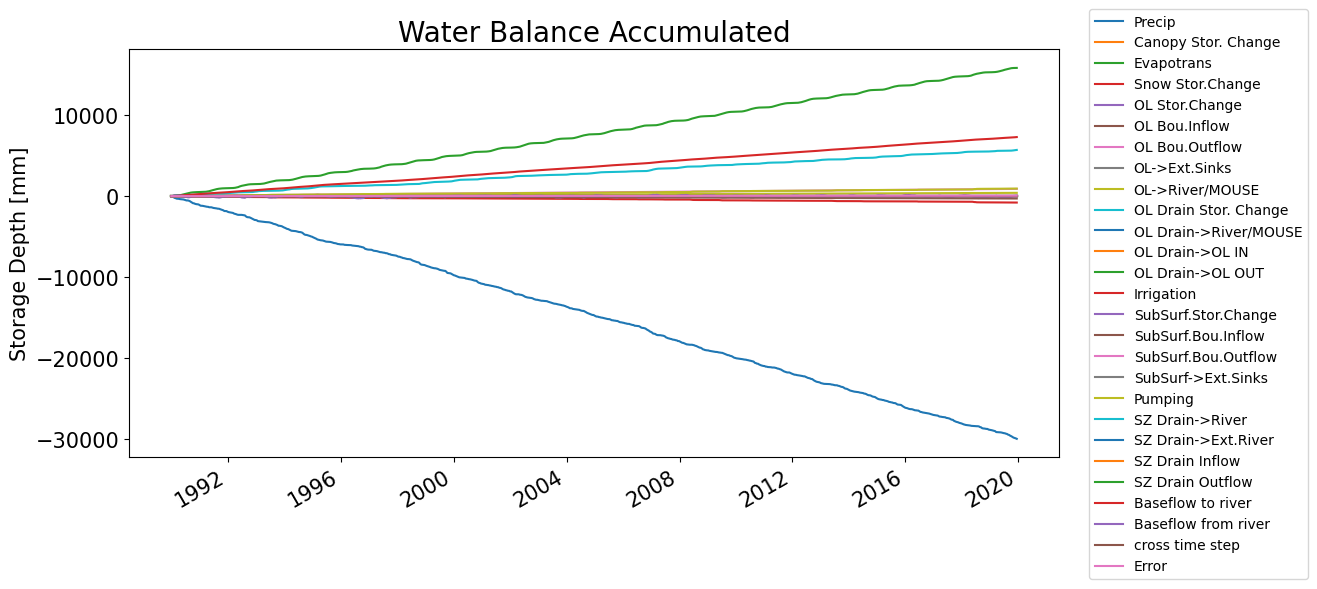

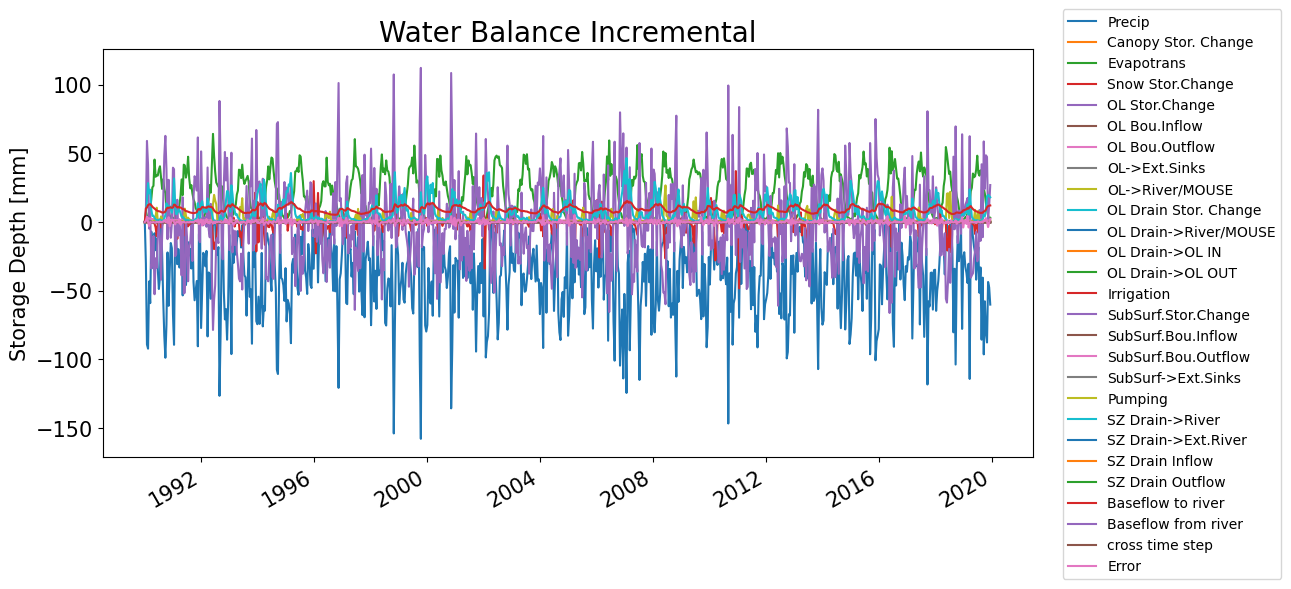

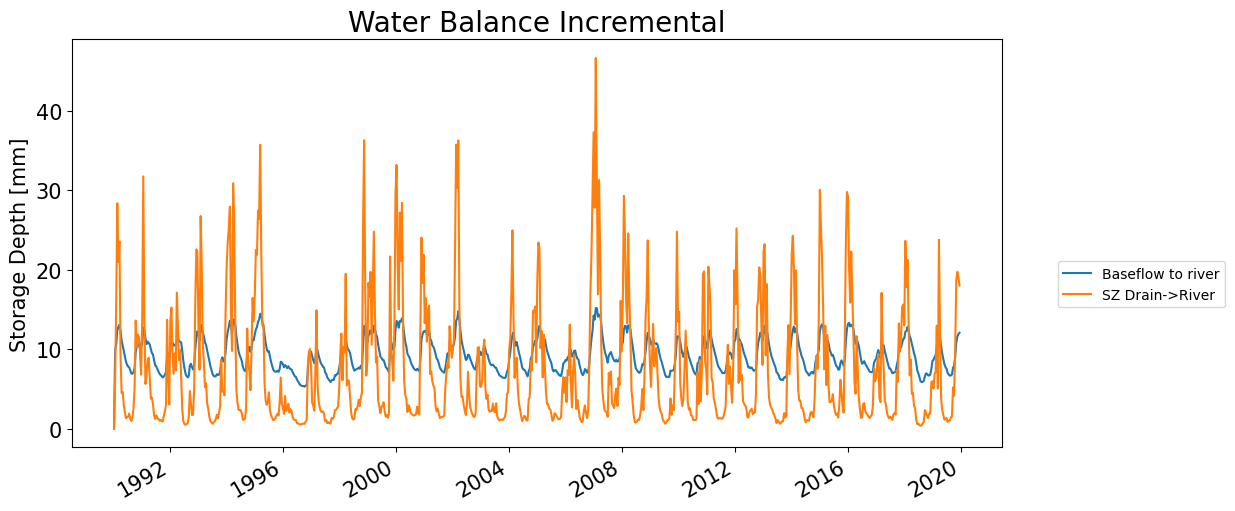

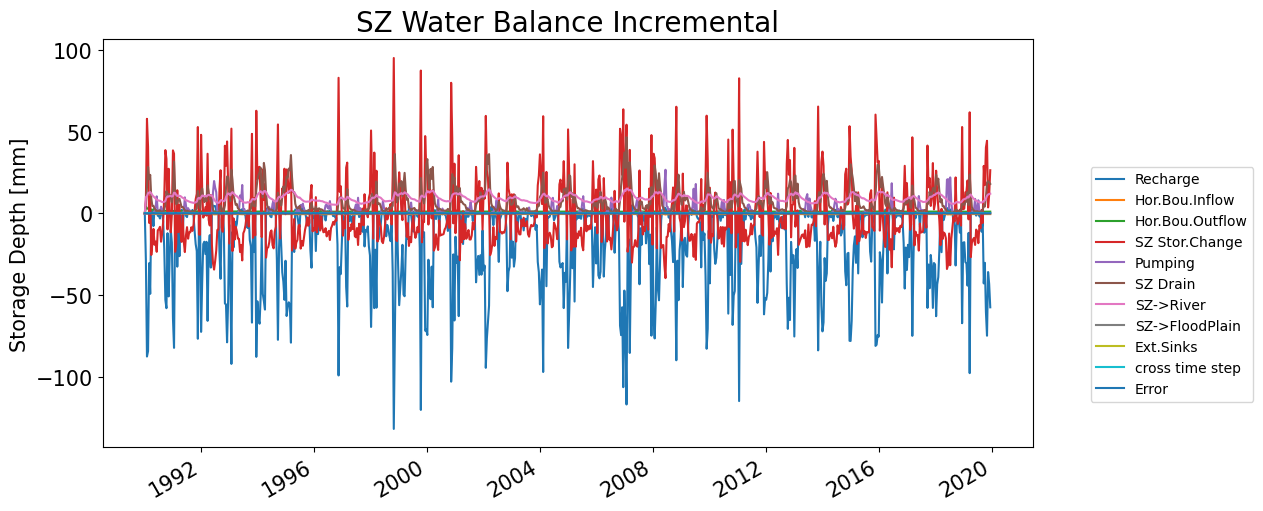

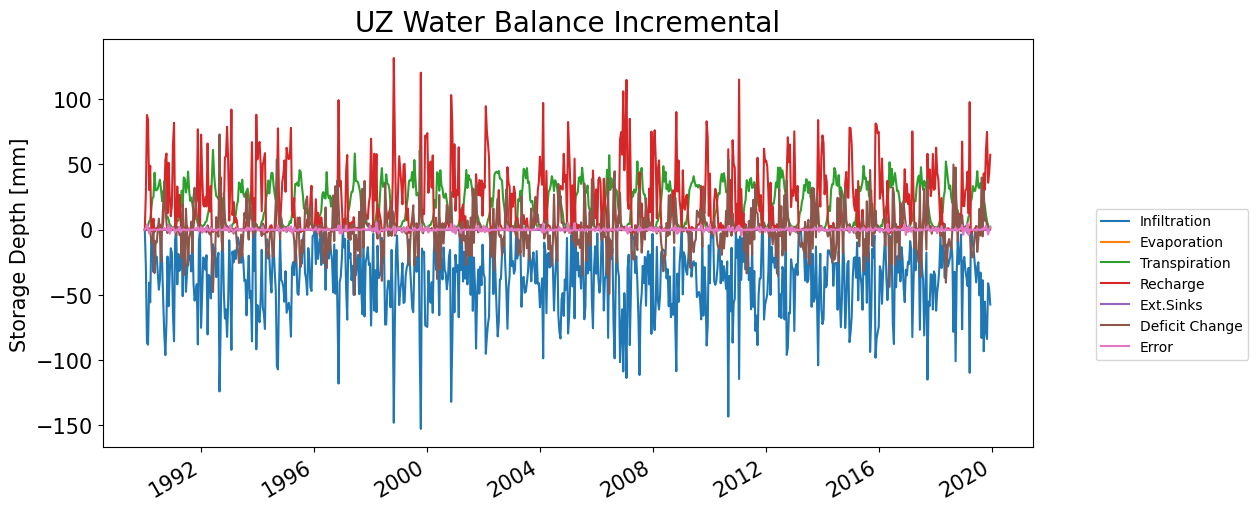

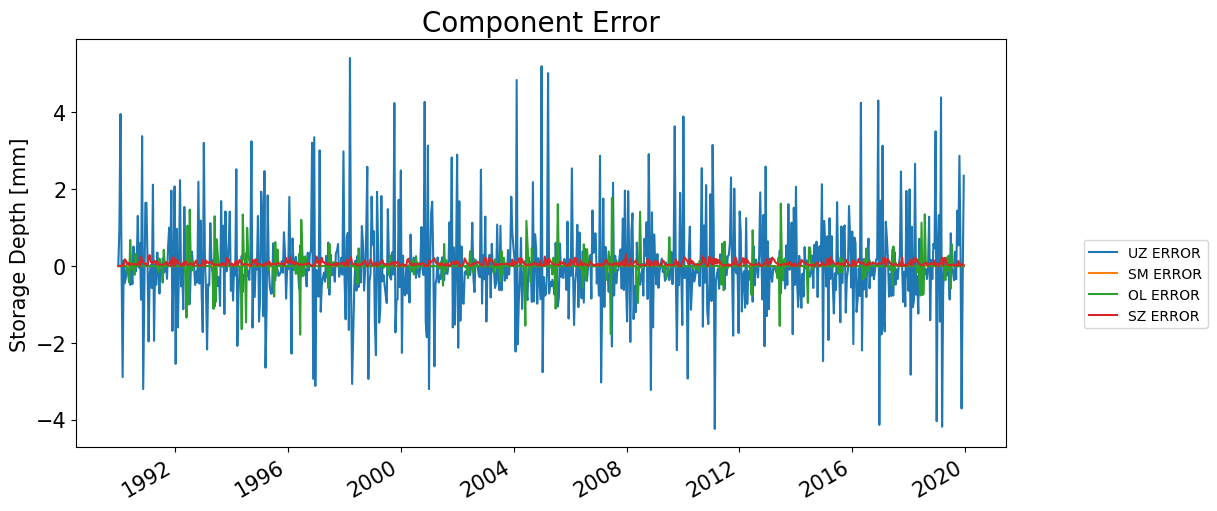

In [ ]:
# ---------------------- Open water balance file (Output from the MIKE Zero Water Balance Tool) ----------------------

# Total accumulated
plot_wb_output(r"..\waterbalance_output\wb_accumulated.dfs0",'Water Balance Accumulated')

# Total incremental
plot_wb_output(r"..\waterbalance_output\wb_incremental.dfs0",'Water Balance Incremental')
# look only at baseflow river and SZ drain to river
varlist = ['Baseflow to river','SZ Drain->River']
plot_wb_output(r"..\waterbalance_output\wb_incremental.dfs0",'Water Balance Incremental',varlist=varlist)

# Saturated zone incremental
plot_wb_output(r"..\waterbalance_output\wb_SZ_incremental.dfs0",'SZ Water Balance Incremental')

# Unsaturated zone incremental
plot_wb_output(r"..\waterbalance_output\wb_UZ_incremental.dfs0",'UZ Water Balance Incremental')

# Water balance errors - positive errors indicate the model is generating water
plot_wb_output(r"..\waterbalance_output\wb_component_error.dfs0",'Component Error',varlist=['UZ ERROR','SM ERROR','OL ERROR','SZ ERROR'])

